# FACTS devices: Static Var Compensator

We implement the FACTS devices based on the PhD Thesis of Ara Panosyan, PhD.

We reproduce the case study from the PhD Thesis using the following grid model:

![title](facts/facts_case_study_grid.png)

In [1]:
import pandas as pd
import pandapower as pp
from pandapower.test.loadflow.test_facts import facts_case_study_grid

In [52]:
wind_profile = pd.read_csv(r"facts/facts_case_study_wind_profile.csv", index_col=0)

<AxesSubplot: xlabel='time_step'>

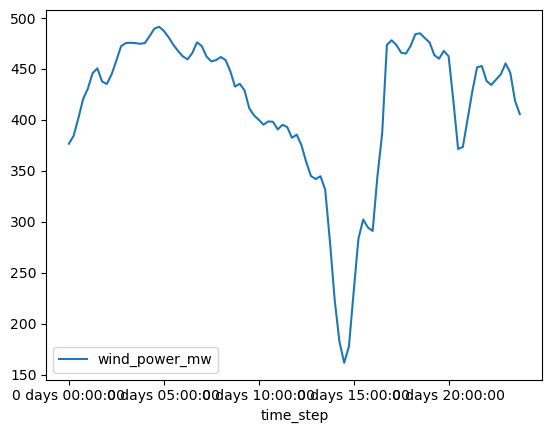

In [54]:
wind_profile.plot()

In [ ]:
net = facts_case_study_grid()
net